In [8]:
import pandas as pd

In [ ]:
NOAA_20_file = "data/NOAA_20_{year}.csv"
SNPP_file = "data/SNPP_{year}.csv"
NOAA_20_data = []
SNPP_data = []

for year in [2019, 2020, 2021, 2022, 2023, 2024]:
    NOAA_20_file = NOAA_20_file.format(year=year)
    SNPP_file = SNPP_file.format(year=year)
    # Read the NOAA-20 data and the SNPP data
    firms_data_NOAA_20 = pd.read_csv(NOAA_20_file)
    firms_data_SNPP = pd.read_csv(SNPP_file)
    # Append the data to the list
    NOAA_20_data.append(firms_data_NOAA_20)
    SNPP_data.append(firms_data_SNPP)

NOAA_20_data = pd.concat(NOAA_20_data, ignore_index=True)
SNPP_data = pd.concat(SNPP_data, ignore_index=True)

In [ ]:
firms_data_NOAA_20 = pd.read_csv('data/DL_FIRE_J1V-C2_598392/fire_archive_J1V-C2_598392.csv')
firms_data_SNPP = pd.read_csv('data/DL_FIRE_SV-C2_598393/fire_archive_SV-C2_598393.csv')

In [ ]:
print("NOAA 20 Data:")
NOAA_20_data.info()

In [ ]:
print("\nSNPP Data:")
SNPP_data.info()

In [ ]:
# Import required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert acquisition date to datetime format
firms_data['acq_date'] = pd.to_datetime(firms_data['acq_date'])

# Step 2: Load the Canada provinces shapefile
# Note: Adjust the path and layer details based on your file.
provinces = gpd.read_file("data/gpr_000b11a_e/gpr_000b11a_e.shp")

# Inspect the provinces GeoDataFrame to see which column contains the province name.
print(provinces.columns)

# Step 3: Convert FIRMS data to a GeoDataFrame using the latitude and longitude columns
fire_gdf = gpd.GeoDataFrame(
    firms_data, 
    geometry=gpd.points_from_xy(firms_data.longitude, firms_data.latitude),
    crs="EPSG:4326"
)

# Step 4: Spatially join the fire points with the province boundaries
# This attaches the province information to each fire record based on location.
fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")

Index(['PRUID', 'PRNAME', 'PRENAME', 'PRFNAME', 'PREABBR', 'PRFABBR',
       'geometry'],
      dtype='object')


/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_38638/2061274241.py:33: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")


In [21]:
fire_with_province

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,daynight,type,geometry,index_right,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR
0,53.54453,-113.38434,333.30,0.39,0.36,2022-01-01,950,N20,VIIRS,n,...,N,0,POINT (-113.38434 53.54453),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.
1,51.25266,-114.85198,328.63,0.39,0.36,2022-01-01,951,N20,VIIRS,n,...,N,0,POINT (-114.85198 51.25266),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.
2,50.58922,-116.12242,332.94,0.38,0.36,2022-01-01,951,N20,VIIRS,n,...,N,0,POINT (-116.12242 50.58922),0.0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.
3,51.25427,-114.85426,322.16,0.43,0.38,2022-01-02,932,N20,VIIRS,n,...,N,0,POINT (-114.85426 51.25427),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.
4,48.18796,-64.92238,298.91,0.49,0.65,2022-01-03,731,N20,VIIRS,n,...,N,2,POINT (-64.92238 48.18796),1.0,24,Quebec / Québec,Quebec,Québec,Que.,Qc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176864,56.17217,-122.40636,299.90,0.40,0.45,2022-12-31,1106,N20,VIIRS,n,...,N,0,POINT (-122.40636 56.17217),0.0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.
176865,56.16853,-122.40988,306.41,0.40,0.45,2022-12-31,1106,N20,VIIRS,n,...,N,0,POINT (-122.40988 56.16853),0.0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.
176866,49.86208,-113.41077,309.33,0.71,0.75,2022-12-31,1107,N20,VIIRS,n,...,N,0,POINT (-113.41077 49.86208),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.
176867,49.86541,-113.41940,301.67,0.71,0.75,2022-12-31,1107,N20,VIIRS,n,...,N,0,POINT (-113.4194 49.86541),10.0,48,Alberta,Alberta,Alberta,Alta.,Alb.


Top three provinces with most wildfires:
PRNAME
Northwest Territories / Territoires du Nord-Ouest    61197
British Columbia / Colombie-Britannique              33311
Alberta                                              21719
Name: count, dtype: int64
Top four months with most wildfires:
month
July         63320
August       46384
September    21590
October      21542
Name: count, dtype: int64


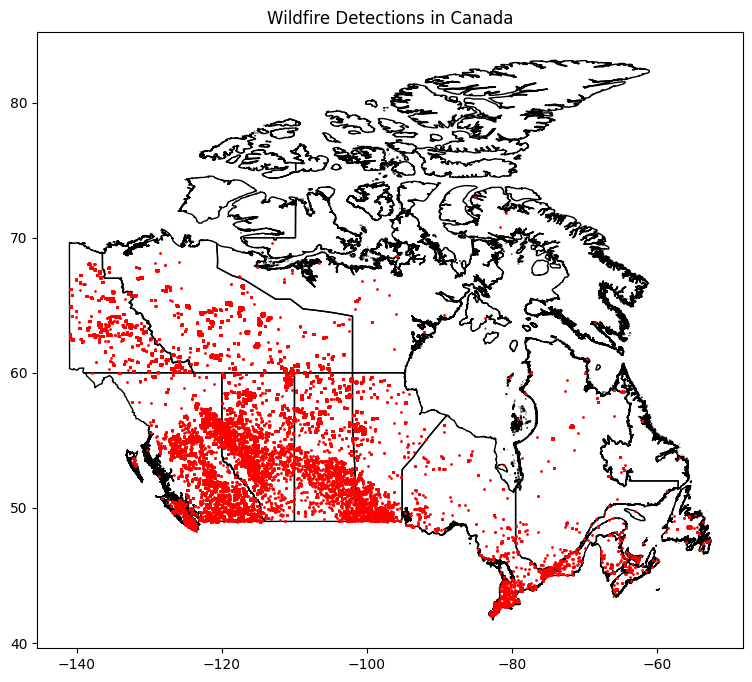

In [22]:
# Step 5: Group by province to get counts of fire detections per province
# Adjust 'NAME' to the appropriate column name in your provinces shapefile if different.
top_provinces = fire_with_province['PRNAME'].value_counts().head(3)
print("Top three provinces with most wildfires:")
print(top_provinces)

# Step 6: Extract the month name from the acquisition date for temporal analysis
firms_data['month'] = firms_data['acq_date'].dt.month_name()

# Count the number of fire events per month and get the top four months
top_months = firms_data['month'].value_counts().head(4)
print("Top four months with most wildfires:")
print(top_months)

# Optional: Plotting the fire locations for a visual check (e.g., using a simple plot)
fig, ax = plt.subplots(figsize=(10, 8))
provinces.plot(ax=ax, color='none', edgecolor='black')
fire_gdf.plot(ax=ax, markersize=1, color='red')
plt.title("Wildfire Detections in Canada")
plt.show()

In [23]:
provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((-123.53977 48.31735, -123.5397..."
1,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((-74.63814 44.99984, -74.63859 ..."
2,62,Nunavut,Nunavut,Nunavut,Nvt.,Nt,"MULTIPOLYGON (((-79.99352 51.27725, -79.99475 ..."
3,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-62.49302 46.02515, -62.49337 ..."
4,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((-102 60, -102 59.99991, -102 59.9999..."
5,60,Yukon,Yukon,Yukon,Y.T.,Yn,"MULTIPOLYGON (((-136.47224 68.89388, -136.4705..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((-95.15588 49.59155, -95.15657 ..."
7,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((-82.68871 41.68453, -82.68631 ..."
8,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((-66.76541 44.58377, -66.76462 ..."
9,61,Northwest Territories / Territoires du Nord-Ouest,Northwest Territories,Territoires du Nord-Ouest,N.W.T.,T.N.-O.,"MULTIPOLYGON (((-133.43943 68.78677, -133.443 ..."
